In [6]:
%matplotlib inline 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
#from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
#HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.read_csv('titles.csv', index_col=None)
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [5]:
cast = pd.read_csv('cast.csv',index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# 1. Using groupby() plot the number of films that have been released each decade in the history of cinema 

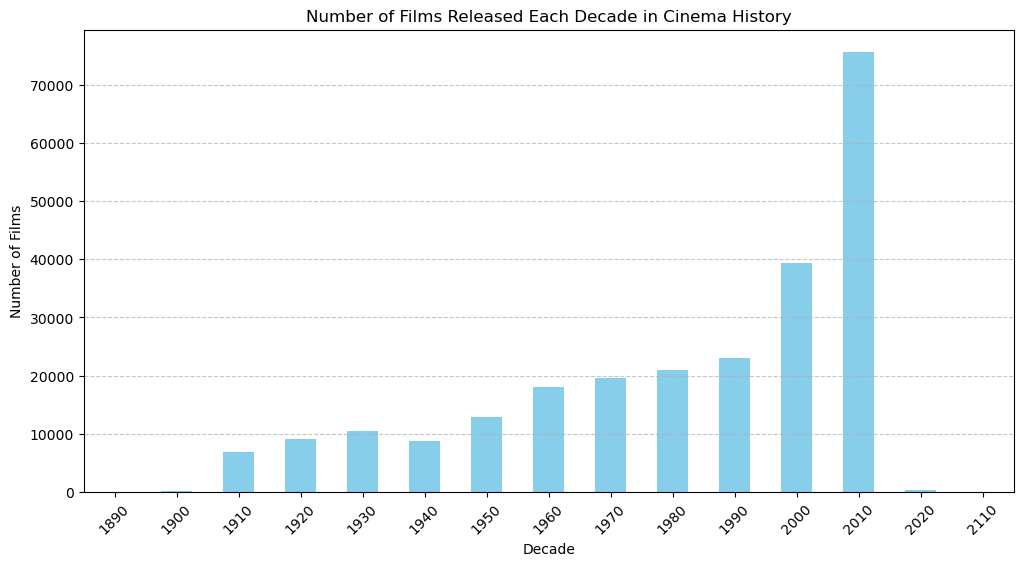

In [7]:
# Extract the decade from the "year" column
titles['decade'] = (titles['year'] // 10) * 10

# Group the DataFrame by the decade and count the number of films in each decade
films_per_decade = titles.groupby('decade')['title'].count()

# Create a bar plot to visualize the number of films per decade
plt.figure(figsize=(12, 6))
films_per_decade.plot(kind='bar', color='skyblue')
plt.title('Number of Films Released Each Decade in Cinema History')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 2. Use groupby() to plot the number of "Hamlet" films made each decade

C:\Users\manthan mankar\AppData\Local\Temp\ipykernel_14128\2838760109.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamlet_films['decade'] = (hamlet_films['year'] // 10) * 10


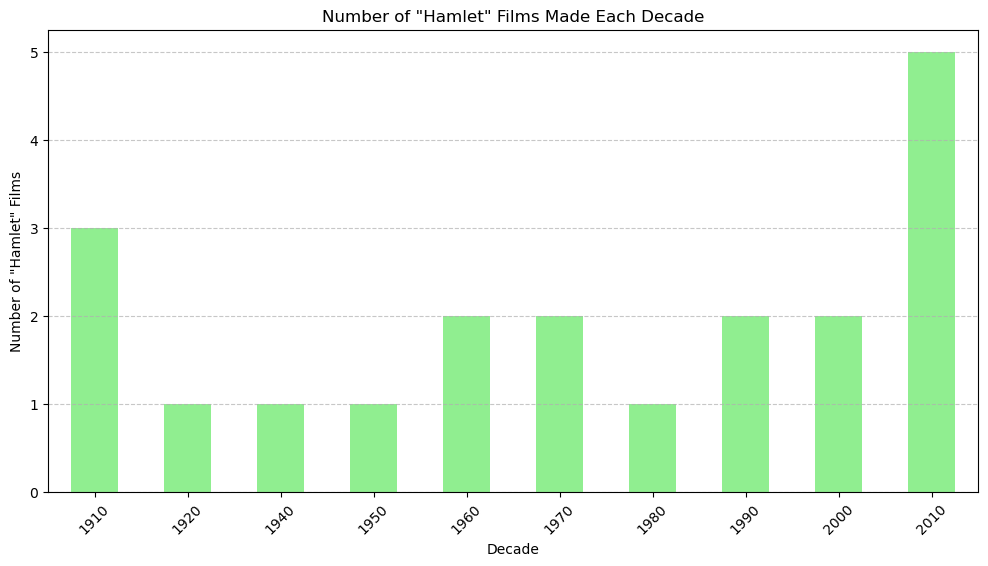

In [8]:
# Filter for rows where the movie title is "Hamlet"
hamlet_films = titles[titles['title'] == 'Hamlet']

# Extract the decade from the "year" column
hamlet_films['decade'] = (hamlet_films['year'] // 10) * 10

# Group the filtered DataFrame by the decade and count the number of "Hamlet" films in each decade
hamlet_films_per_decade = hamlet_films.groupby('decade')['title'].count()

# Create a bar plot to visualize the number of "Hamlet" films per decade
plt.figure(figsize=(12, 6))
hamlet_films_per_decade.plot(kind='bar', color='lightgreen')
plt.title('Number of "Hamlet" Films Made Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of "Hamlet" Films')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 3. How many leading(n=1) roles were available to actors and how many to actresses in each years of 1950s

In [11]:
# Filter for rows where the year is between 1950 and 1959 (inclusive)
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

# Count the number of leading roles (n=1) for actors and actresses in the 1950s
leading_roles_actors_1950s = len(roles_1950s[(roles_1950s['n'] == 1) & (roles_1950s['type'] == 'actor')])
leading_roles_actresses_1950s = len(roles_1950s[(roles_1950s['n'] == 1) & (roles_1950s['type'] == 'actress')])

print("Number of leading roles (n=1) for actors in the 1950s:", leading_roles_actors_1950s)
print("Number of leading roles (n=1) for actresses in the 1950s:", leading_roles_actresses_1950s)

Number of leading roles (n=1) for actors in the 1950s: 6692
Number of leading roles (n=1) for actresses in the 1950s: 3040


# 4. In the 1950s decade taken as a whole, how many total roles were available to actors and how many to actresses, for each "n" number 1 through 5?

In [14]:
# Filter for rows where the year is between 1950 and 1959 (inclusive)
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

# Group the filtered DataFrame by "n" and actor/actress type, then count the roles
roles_by_n_and_type = roles_1950s.groupby(['n', 'type'])['n'].count().unstack(fill_value=0)

print("Number of roles available to actors and actresses in the 1950s, by 'n' value:")
print(roles_by_n_and_type)


Number of roles available to actors and actresses in the 1950s, by 'n' value:
type   actor  actress
n                    
1.0     6692     3040
2.0     4640     4635
3.0     5654     3201
4.0     5663     2881
5.0     5674     2592
...      ...      ...
162.0      0        1
163.0      0        1
164.0      0        1
418.0      0        1
788.0      0        1

[166 rows x 2 columns]


# 5. Use groupby() to determine how many roles are listed for each fo the Pink Panther movies

In [15]:
# Filter for rows where the movie title contains "Pink Panther"
pink_panther_movies = cast[cast['title'].str.contains('Pink Panther', case=False)]

# Group the filtered DataFrame by the movie's title and count the number of roles for each movie
roles_per_movie = pink_panther_movies.groupby('title')['character'].count()

print("Number of roles listed for each of the Pink Panther movies:")
print(roles_per_movie)


Number of roles listed for each of the Pink Panther movies:
title
Curse of the Pink Panther          67
Revenge of the Pink Panther        68
Son of the Pink Panther            46
The Pink Panther                  111
The Pink Panther 2                 84
The Pink Panther Strikes Again     70
The Return of the Pink Panther     30
Trail of the Pink Panther          41
Name: character, dtype: int64


# 6. List, in order by year each of the films in which Frank Oz has played more than 1 role 

In [26]:
# Filter for rows where the actor's name is "Frank Oz"
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

# Group the filtered DataFrame by movie title and year, and count the number of roles
roles_per_movie = frank_oz_roles.groupby(['title', 'year'])['character'].count().reset_index()

# Filter for movies where Frank Oz played more than one role
movies_with_multiple_roles = roles_per_movie[roles_per_movie['character'] > 1]

# Sort the movies by year
movies_with_multiple_roles_sorted = movies_with_multiple_roles.sort_values(by='year')

print("Films in which Frank Oz played more than one role, in order by year:")
print(movies_with_multiple_roles_sorted)


Films in which Frank Oz played more than one role, in order by year:
                                   title  year  character
24                      The Muppet Movie  1979          8
0         An American Werewolf in London  1981          2
22                The Great Muppet Caper  1981          6
20                      The Dark Crystal  1982          2
25            The Muppets Take Manhattan  1984          7
2                       Follow That Bird  1985          3
23            The Muppet Christmas Carol  1992          7
7                 Muppet Treasure Island  1996          4
8                     Muppets from Space  1999          4
18  The Adventures of Elmo in Grouchland  1999          3


# 7. List each of the characters that Frank Oz has portrayed least twice

In [28]:
# Filter for rows where the actor's name is "Frank Oz"
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

# Group the filtered DataFrame by character name and count the number of appearances
character_appearances = frank_oz_roles.groupby('character')['name'].count()

# Filter for characters with at least two appearances
characters_at_least_twice = character_appearances[character_appearances >= 2]

print("Characters portrayed by Frank Oz at least twice:")
print(characters_at_least_twice)


Characters portrayed by Frank Oz at least twice:
character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
Name: name, dtype: int64
